In [30]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score,classification_report,recall_score,precision_score,f1_score,r2_score

import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.shape

(150, 6)

In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

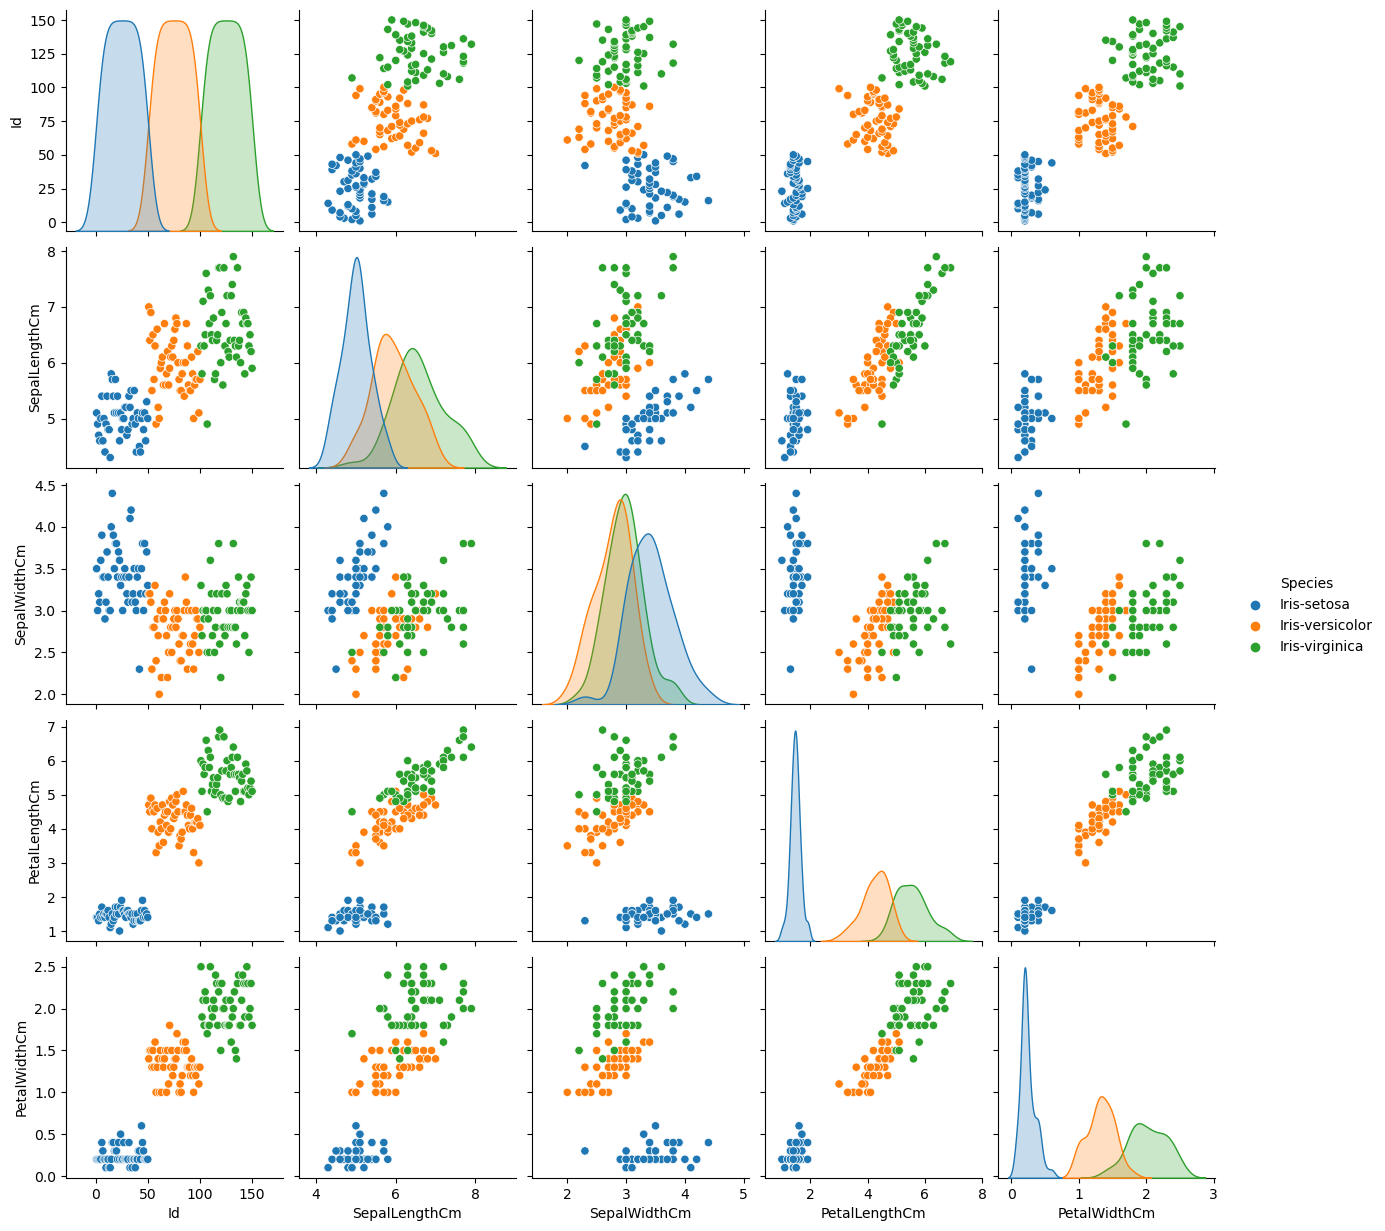

In [10]:
sns.pairplot(df, hue = 'Species')
plt.show()

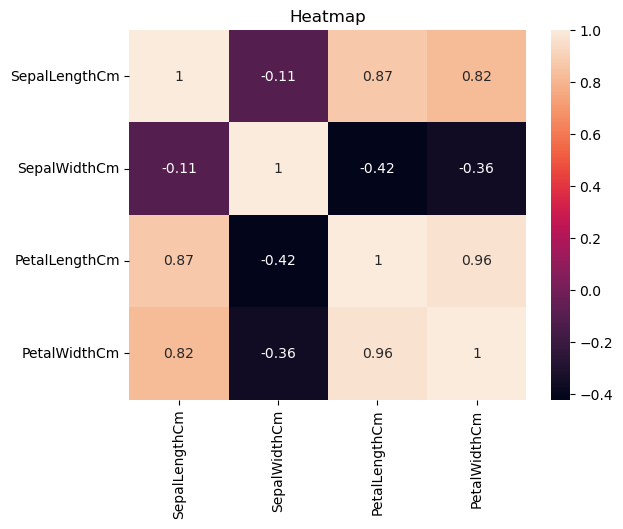

In [59]:
sns.heatmap(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']].corr(),annot=True)
plt.title("Heatmap")
plt.show()

<AxesSubplot:xlabel='Species', ylabel='count'>

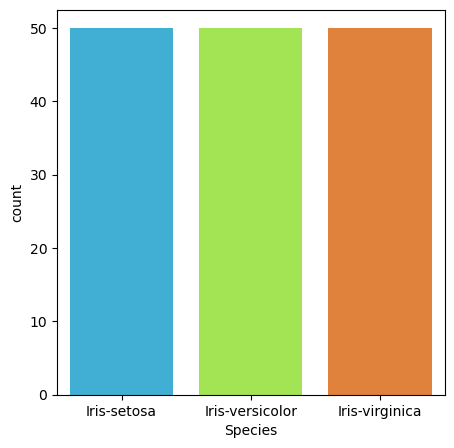

In [46]:
plt.figure(figsize=(5,5))
sns.countplot(x='Species',data=df,palette='turbo')

Text(0.5, 1.0, 'Distribution of Sepal Width Per Species')

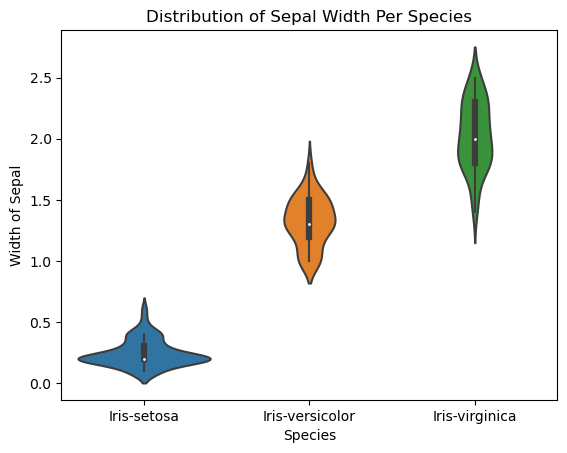

In [36]:
sns.violinplot(x = 'Species',data= df, y='PetalWidthCm')
plt.ylabel("Width of Sepal")
plt.title("Distribution of Sepal Width Per Species")

Text(0.5, 1.0, 'Sepal Length for Species')

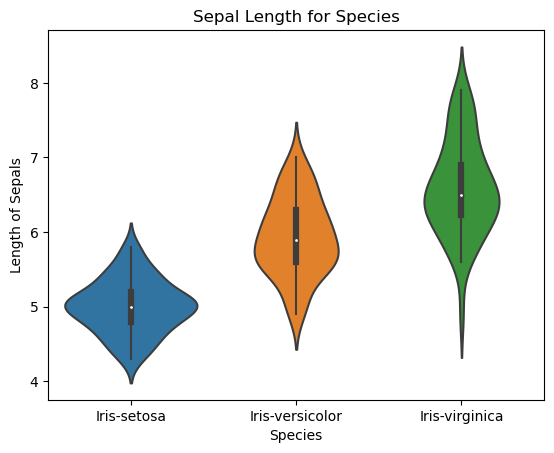

In [38]:
sns.violinplot(x='Species', y='SepalLengthCm', data=df)
plt.ylabel("Length of Sepals")
plt.title("Sepal Length for Species")

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

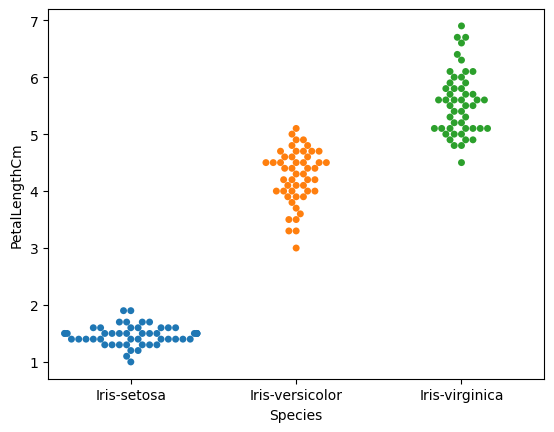

In [39]:
sns.swarmplot(x="Species", y="PetalLengthCm", data=df)

<AxesSubplot:>

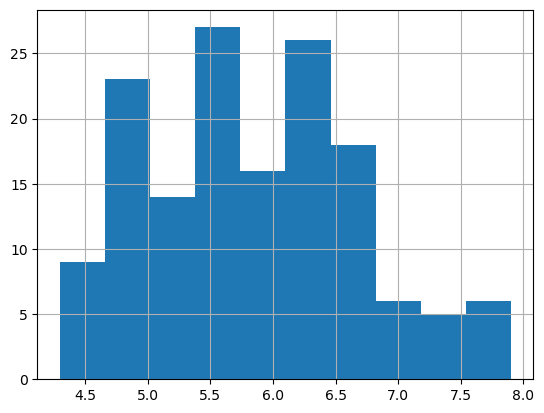

In [49]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

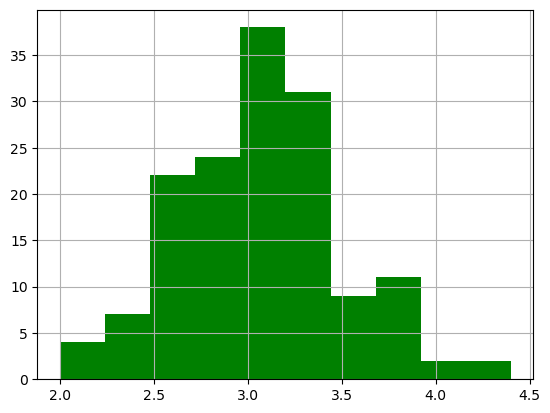

In [51]:
df['SepalWidthCm'].hist(color='green')

<AxesSubplot:>

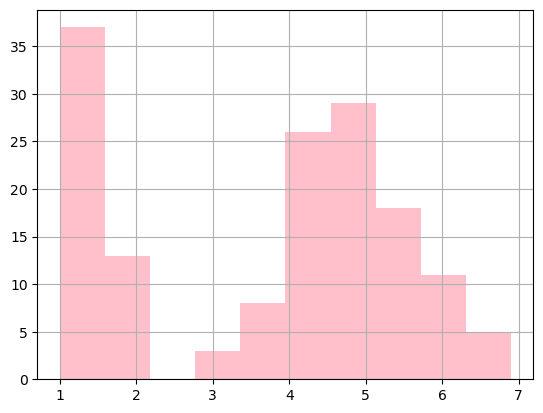

In [52]:
df['PetalLengthCm'].hist(color='pink')

<AxesSubplot:>

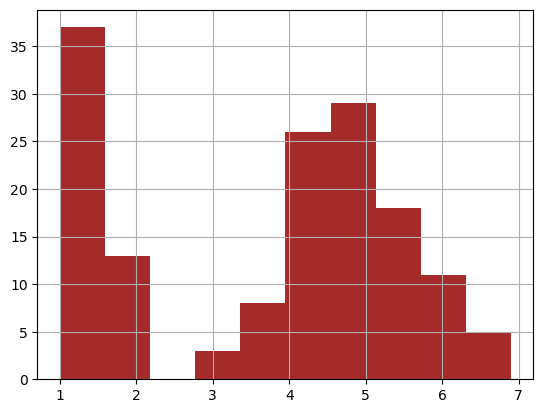

In [53]:
df['PetalLengthCm'].hist(color='brown')

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

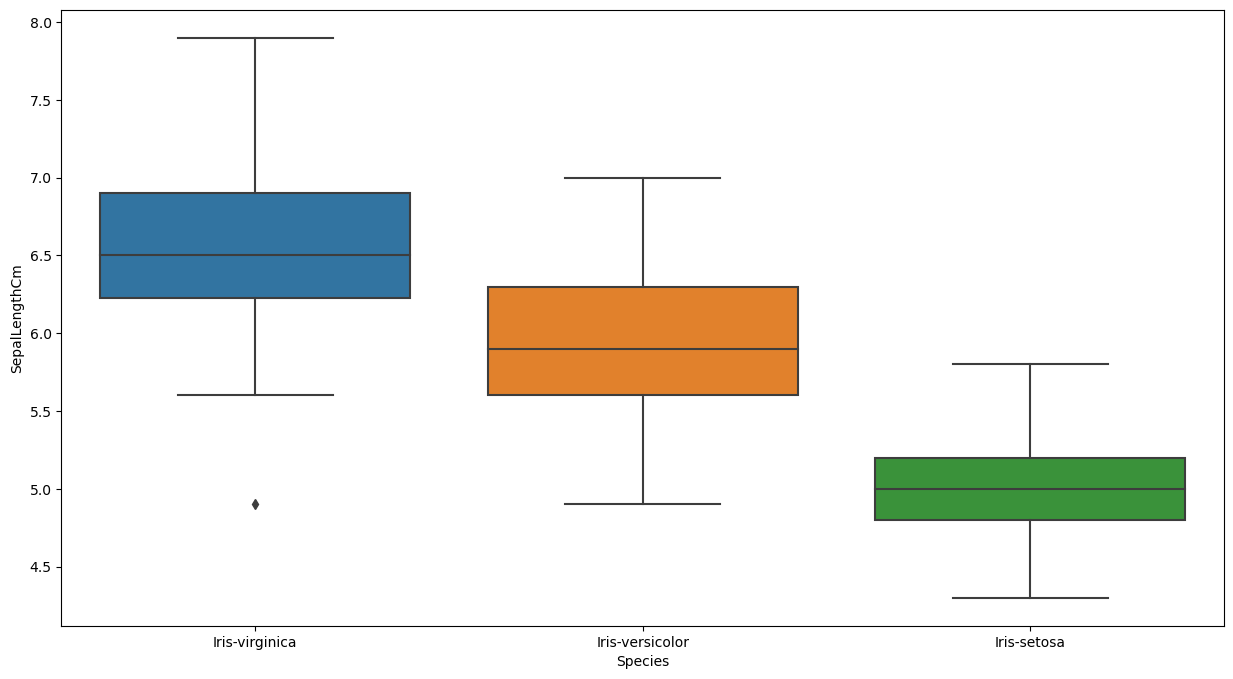

In [54]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

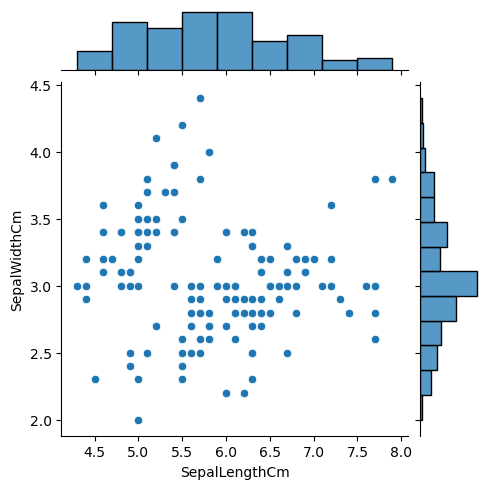

In [55]:
#  Relationship between sepal width and sepal length

sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=df,size=5)

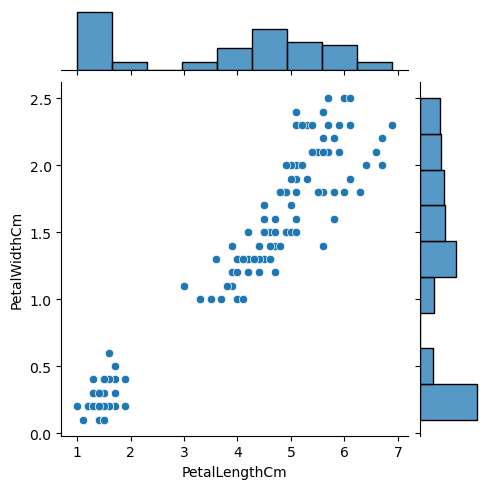

In [56]:
#  Relationship between petal width and petal length

sns.jointplot(x='PetalLengthCm',y='PetalWidthCm',data=df,size=5)

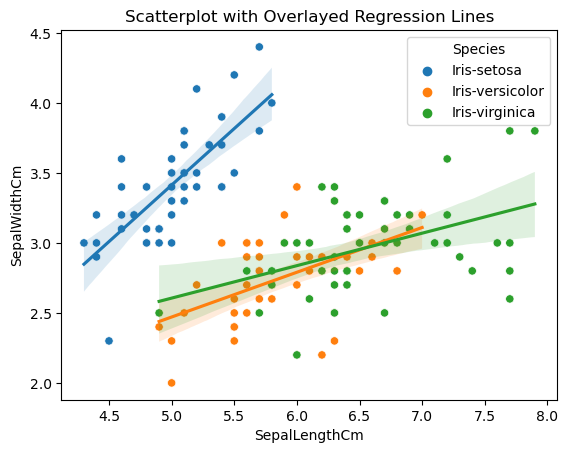

In [60]:
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')

# Overlay regression lines for each species
sns.regplot(data=df[df['Species']=='Iris-setosa'], x='SepalLengthCm', y='SepalWidthCm', scatter=False)
sns.regplot(data=df[df['Species']=='Iris-versicolor'], x='SepalLengthCm', y='SepalWidthCm', scatter=False)
sns.regplot(data=df[df['Species']=='Iris-virginica'], x='SepalLengthCm', y='SepalWidthCm', scatter=False)

plt.title('Scatterplot with Overlayed Regression Lines')
plt.legend(title='Species')
plt.show()

In [11]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [12]:
df.drop('Id',axis=1,inplace=True)
x = df.drop(['Species'],axis=1)
y = df['Species']

In [13]:
mm = MinMaxScaler()
x1 = pd.DataFrame(mm.fit_transform(x))
x1

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [14]:
def data_algo(df, algorithms): 
    results = []
    x = df.drop(['Species'],axis=1)
    y = df['Species']
    
    xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size=0.25,random_state=30)
    
    for algorithm in algorithms:
        print(f"{algorithm}...")

        # Fit the algorithm to the training data
        algorithm.fit(xtrain, ytrain)

        # Predict the target variable for the test data
        y_predtrain = algorithm.predict(xtrain)
        y_predtest = algorithm.predict(xtest)

        # Calculate the accuracy score
        train_accuracy = accuracy_score(ytrain,y_predtrain)
        test_accuracy = accuracy_score(ytest, y_predtest)
        print(f"Training Accuracy: {train_accuracy}")
        print(f"Testing Accuracy: {test_accuracy}\n")
        
        variance = train_accuracy - test_accuracy

        results.append({'Algorithm': str(algorithm), 'Training Accuracy': train_accuracy, 'Testing Accuracy':test_accuracy,'Varience':variance})
        
    df_results = pd.DataFrame(results)
    return df_results     

# Usage example
algorithms = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    SVC(),
    GaussianNB()
]

df_model = data_algo(df, algorithms)
df_model.sort_values(by='Varience')

LogisticRegression()...
Training Accuracy: 0.9553571428571429
Testing Accuracy: 0.9473684210526315

DecisionTreeClassifier()...
Training Accuracy: 1.0
Testing Accuracy: 0.9736842105263158

KNeighborsClassifier()...
Training Accuracy: 0.9732142857142857
Testing Accuracy: 0.9736842105263158

RandomForestClassifier()...
Training Accuracy: 1.0
Testing Accuracy: 0.9473684210526315

SVC()...
Training Accuracy: 0.9910714285714286
Testing Accuracy: 0.9736842105263158

GaussianNB()...
Training Accuracy: 0.9732142857142857
Testing Accuracy: 0.9473684210526315



,Algorithm,Training Accuracy,Testing Accuracy,Varience
2,KNeighborsClassifier(),0.973214,0.973684,-0.000470
0,LogisticRegression(),0.955357,0.947368,0.007989
4,SVC(),0.991071,0.973684,0.017387
5,GaussianNB(),0.973214,0.947368,0.025846
1,DecisionTreeClassifier(),1.000000,0.973684,0.026316
3,RandomForestClassifier(),1.000000,0.947368,0.052632


Logistic Regression and KNN model gave the best performance with 97.77% accuracy